In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine,inspect, func, desc
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session

In [2]:
engine = create_engine('sqlite:///hawaii.sqlite', echo=False)

Base = automap_base()

In [3]:
Base.prepare(engine, reflect=True)
Base.classes.keys()
#I have no idea how to delete the extra station table

['measurement', 'stations', 'station']

In [4]:
Measurement = Base.classes.measurement

In [5]:
Station = Base.classes.stations

In [6]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [7]:
session = Session(engine)

In [8]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [9]:
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

one_year_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > first_date).\
                        order_by(Measurement.date).all()

In [10]:
precipitation_df = pd.DataFrame(one_year_prcp, columns=['Date', 'Prcp'])

precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y/%m/%d')

precipitation_df.set_index(precipitation_df['Date'], inplace=True)
precipitation_df.head()

,Date,Prcp
Date,,
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15
2016-08-24,2016-08-24,2.28
2016-08-24,2016-08-24,1.22
2016-08-24,2016-08-24,2.15


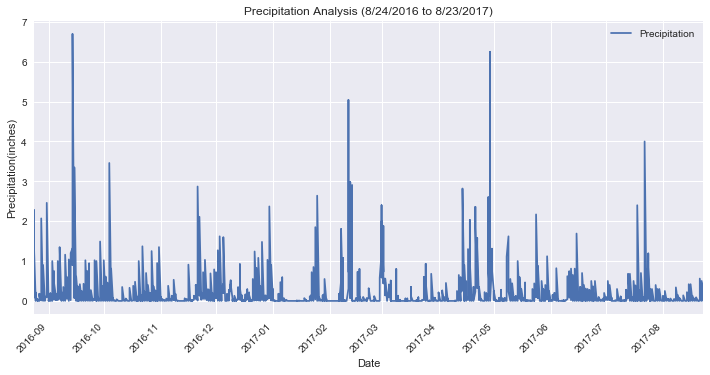

In [11]:
precipitation_df.plot('Date', 'Prcp',figsize=(12,6))
plt.xlabel("Date")
plt.ylabel("Precipitation(inches)")
plt.title("Precipitation Analysis (8/24/2016 to 8/23/2017)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()

In [12]:
precipitation_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
precipitation_sum = pd.DataFrame(one_year_prcp, columns=['Date', 'Prcp'])
precipitation_sum['Date'] = pd.to_datetime(precipitation_sum['Date'], format='%Y/%m/%d')

precipitation_totals = precipitation_sum.pivot_table(precipitation_sum, index=['Date'], aggfunc='mean')
precipitation_totals.head()

,Prcp
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


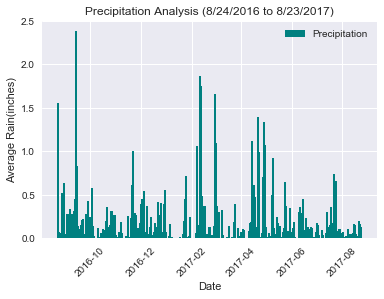

In [15]:
plt.bar(precipitation_totals.index, precipitation_totals["Prcp"], width=2.5, color="teal")
plt.rcParams["figure.figsize"] = [12,6]
plt.xlabel("Date")
plt.ylabel("Average Rain(inches)")
plt.title("Precipitation Analysis (8/24/2016 to 8/23/2017)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.show()

In [16]:
precipitation_totals.describe()

,Prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [17]:
station_count = session.query(Station.station).count()
print("There are {} stations.".format(station_count))


There are 9 stations.


In [19]:
station_tobs = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                    join(Station).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.tobs).desc()).all()

print("The stations with the highest number of observations are:")
print()
for station, name, count in station_tobs:
    print("Station:",station, "in",name,"with",count, "observations.")

The stations with the highest number of observations are:

Station: USC00519281 in WAIHEE 837.5, HI US with 2772 observations.
Station: USC00513117 in KANEOHE 838.1, HI US with 2696 observations.
Station: USC00519397 in WAIKIKI 717.2, HI US with 2685 observations.
Station: USC00519523 in WAIMANALO EXPERIMENTAL FARM, HI US with 2572 observations.
Station: USC00516128 in MANOA LYON ARBO 785.2, HI US with 2484 observations.
Station: USC00514830 in KUALOA RANCH HEADQUARTERS 886.9, HI US with 1937 observations.
Station: USC00511918 in HONOLULU OBSERVATORY 702.2, HI US with 1932 observations.
Station: USC00517948 in PEARL CITY, HI US with 683 observations.
Station: USC00518838 in UPPER WAHIAWA 874.3, HI US with 342 observations.


In [22]:
station_max_obs = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                    join(Station).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.tobs).desc()).first()
    
print("Station {}".format(station_max_obs[0]),"in {}".format(station_max_obs[1]),
      "has the most obesrvations with {}.".format(station_max_obs[2]))

Station USC00519281 in WAIHEE 837.5, HI US has the most obesrvations with 2772.


In [23]:
station_12m_obs = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
                    join(Station).\
                    group_by(Measurement.station).\
                    filter(Measurement.date > first_date).\
                    order_by(func.count(Measurement.tobs).desc()).all()

busiest_station = station_12m_obs[0][0:2]   

print("The stations with the highest number of observations in the last 12 months are:")
print()
for station, name, count in station_12m_obs:
    print("Station:",station, "in",name,"with",count, "observations.")

The stations with the highest number of observations in the last 12 months are:

Station: USC00519397 in WAIKIKI 717.2, HI US with 358 observations.
Station: USC00519281 in WAIHEE 837.5, HI US with 351 observations.
Station: USC00513117 in KANEOHE 838.1, HI US with 342 observations.
Station: USC00516128 in MANOA LYON ARBO 785.2, HI US with 327 observations.
Station: USC00519523 in WAIMANALO EXPERIMENTAL FARM, HI US with 313 observations.
Station: USC00514830 in KUALOA RANCH HEADQUARTERS 886.9, HI US with 264 observations.
Station: USC00517948 in PEARL CITY, HI US with 60 observations.


In [24]:
busy_station_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest_station[0]).\
    filter(Measurement.date > first_date).\
    order_by(Measurement.date).all()

tobs_df = pd.DataFrame(busy_station_obs, columns=['Date', 'Tobs'])
tobs_df.head()

,Date,Tobs
0,2016-08-24,79
1,2016-08-25,80
2,2016-08-26,79
3,2016-08-27,77
4,2016-08-28,78


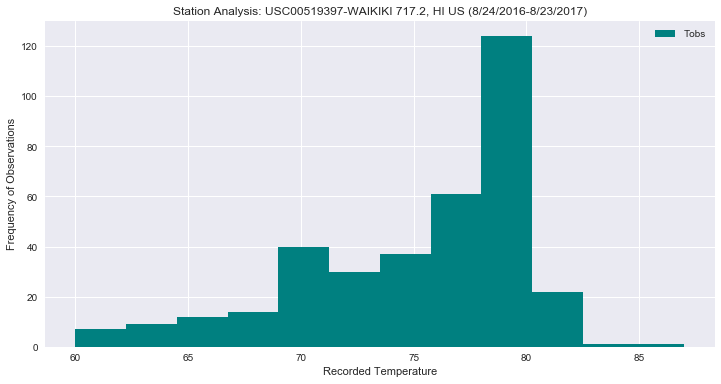

In [25]:
plt.hist(tobs_df['Tobs'],bins=12, color="teal")
plt.rcParams["figure.figsize"] = [10,6]
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency of Observations")
plt.title("Station Analysis: USC00519397-WAIKIKI 717.2, HI US (8/24/2016-8/23/2017)")
plt.legend(["Tobs"])
plt.show()

In [26]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

    query = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
    for Tmin, Tmax, Tavg in query:
        print("From", start_date, "to", end_date, "the minimum temperature is",
              Tmin,'\u00b0'"F, the maximum temperature is", Tmax,'\u00b0'"F, and the average temeperature is",
              "{0:.1f}".format(round(Tavg,1)),'\u00b0'"F.")

calc_temps('2017-06-28', '2017-07-07')

From 2017-06-28 to 2017-07-07 the minimum temperature is 74 °F, the maximum temperature is 81 °F, and the average temeperature is 77.3 °F.


In [27]:
start_date = '2017-06-28'
end_date = '2017-07-07'
vacation_query = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

vacation_temps = pd.DataFrame(vacation_query, columns=['Date', 'Tobs'])
vacation_temps.head()

,Date,Tobs
0,2017-06-28,79
1,2017-06-29,79
2,2017-06-30,75
3,2017-07-01,80
4,2017-07-02,80


In [28]:
vacation_temps.describe()

,Tobs
count,50.000000
mean,77.260000
std,2.174152
min,74.000000
25%,76.000000
50%,77.000000
75%,79.000000
max,81.000000


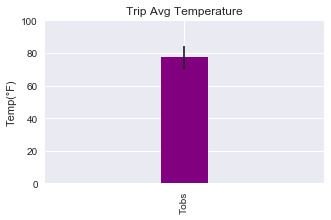

In [30]:
avg_temp = vacation_temps.mean()
temp_diff = (vacation_temps["Tobs"].max()-vacation_temps["Tobs"].min())


p = avg_temp.plot(legend=False,kind="bar",color="purple",yerr=temp_diff, width=0.1, figsize=(5,3))
p.set_title("Trip Avg Temperature")
p.set_ylabel("Temp(°F)")
p.set_ylim(0,100)
plt.show()